# <img src="https://img.icons8.com/external-flaticons-lineal-color-flat-icons/64/000000/external-image-analysis-big-data-flaticons-lineal-color-flat-icons-2.png" style="height:50px;display:inline"/> EE 046200 - Technion - Image Processing and Analysis
----

# Computer Homework 3
---
### <span style="color:red"> Due Date: 13.07.25 </span>

## <img src="https://img.icons8.com/clouds/100/000000/upload.png" style="height:50px;display:inline" /> Submission guidelines
---

### READ THIS CAREFULLY

*	**Please notice:** Some of the exercises contain questions on topics that are yet to be taught in the lecture or the frontal exercises. You may consider them as background or preparation questions to the topic before learning about it in class, or you may wait until the topic is taught, and solve only the questions on the topics you already learned.
*	**Avoid unethical behavior.** This includes plagiarism, not giving credit to source code you decide to use, and false reporting of results. Consulting with friends is allowed and even recommended, but you must write the code on your own, independently of others. The staff will treat unethical behavior with the utmost severity. **!אנא המנעו מהתנהגות שאינה אתית והעתקות**
*	Code submission in **Python only**.
    You can choose your working environment:
    * You can work in a Jupyter Notebook , locally with <a href="https://www.anaconda.com/distribution/">Anaconda</a> (the course's computer HW will not require a GPU).
    * You can work in a Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>. Both also allow opening/editing Jupyter Notebooks.
*	The exercise must be submitted **IN PAIRS** (unless the computer homework grader approved differently) until **<span style="color:red"> Thursday 13.07.2025 at 23:55</span>**.
*	The exercise will be submitted via Moodle in the following form:
    You should submit two **separated** files:
    * A report file (visualizations, discussing the results and answering the questions) in a `.pdf` format, with the name `hw3_id1_id2.pdf` where `id1`,`id2` are the ID numbers of the submitting students.
        * Be precise, we expect on point answers. But don't be afraid to explain you statements (actually, we expect you to).
        * Even if the instructions says "Show/Display...", you still need to explain what are you showing and what can be seen.
        * No other file-types ( `.docx` , `.html` , ...) will be accepted
    * A compressed `.zip` file, with the name: `hw3_id1_id2.zip` which contains:
        * A folder named `code` with all the code files inside ( `.py` or `.ipynb` ONLY!)
            *	The code should be reasonably documented, especially in places where non-trivial actions are performed.
            *	Make sure to give a suitable title (informative and accurate) to each image or graph, and also to the axes. Ensure that graphs and images are displayed in a sufficient size to understand their content (and maintain the relationship between the axes - do not distort them).
        * A folder named `my_data`, with all the files required for the code to run (your own images/videos) and all the files you created. make sure to refer to your input files in the code locally. i.e. (if the code is in 'code' directory, and the input file is in a parallel 'my_data' directory):
            `img = cv2.imread('../my_data/my_img.jpg')`
        * **DO NOT** include the given input data in the zip. The code should refer to the given input data as it is located in a folder named `given_data`. i.e.:
            `img = cv2.imread('../given_data/given_img.jpg')`
*	If you submit your solution after the deadline, 4 points will be reduced automatically for each of the days that have passed since the submission date (unless you have approved it with the course staff before the submission date). Late submission will be done directly to the computer homework grader via mail, and not via Moodle.
*	Several Python, numpy, openCV reference files are attached in the Moodle website, and you can of course also use the Internet's help.
*	Questions about the **computer** exercise can be directed to the computer homework grader through the relevant Moodle forum or by email.


## <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> General Notes:
---

In [1]:
# imports for the HW
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

## <img src="https://img.icons8.com/dusk/64/000000/video-trimming.png" style="height:50px;display:inline"/> Part 1 - Sampling and Aliasing in Images
---
In This part we will sample images **in space and in time**, and examine the phenomenon of **aliasing** in both types of sampling. 

In order to do so, we will use the music video of the song Brothers in Arms by Dire Straits. 

Please use the download link available on the course moodle site. Copy the downloaded file to `given_data` folder.

You are encouraged to open the file `Dire Straits - Brothers In Arms.mp4`, to watch the video and appreciate the musical composition.

### 1.a - Spatial Sampling:
1. Sample the last frame from the 50th second of the `Dire Straits - Brothers In Arms.mp4` video and display it. You may use the `video_to_frames` function from your second python HW.

For the spatial sampling in this section we will use a rotated version of this frame, and focus on the region in the frame which contains the neck of the guitar, as seen in the red rectangle in the following figure.

We will focus on counting the string shadows in the red marked area.

# ![Guitar](guitar_frame.png)

In [2]:
def video_to_frames(vid_path: str, start_second, end_second):
    """
    Load a video and return its frames from the wanted time range.
    :param vid_path: video file path.
    :param start_second: time of first frame to be taken from the 
                         video in seconds.
    :param end_second: time of last frame to be taken from the 
                         video in seconds.
    :return:
        frame_set: a 4D uint8 np array of size [num_of_frames x H x W x C] 
                   containing the wanted video frames.
    """
    # ====== YOUR CODE: ======
    cap = cv2.VideoCapture(vid_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    start_frame = int(start_second * fps)
    end_frame = int(end_second * fps)

    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    frames = []
    for _ in range(end_frame - start_frame):
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)

    cap.release()
    frame_set = np.array(frames)
    # ========================
    
    return frame_set


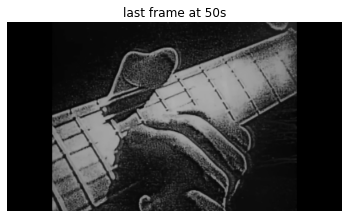

In [3]:
frames = video_to_frames("../given_data/Dire Straits - Brothers In Arms.mp4", 50, 51)
last_frame = frames[-1]

# Display
plt.imshow(last_frame)
plt.title("last frame at 50s")
plt.axis('off')
plt.show()

Before examining a specific row in the image, we'd like to rotate the image around its center.

Use the provided function `rotate` using `cv2.getRotationMatrix2D` and `cv2.warpAffine` to rotate the image.

The function `rotate` returns the rotated image, given the arguments:
1. `image` - the original image to rotate.
2. `angle` - the rotation angle (degrees).

In [4]:
##### Given code
def rotate(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], 
                            flags=cv2.INTER_LINEAR)
    return result

From now on, work with the rotated image.

Display the rotated image, using `angle` value in the interval $[-20, -30]$. 

Choose a value that places the guitar neck horizontally. 

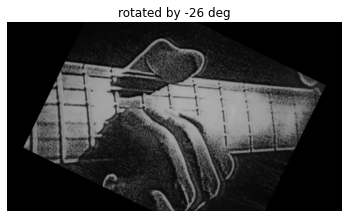

In [5]:
rot_frame = rotate(last_frame, - 26)

plt.imshow(rot_frame)
plt.title("rotated by -26 deg")
plt.axis('off')
plt.show()

2 .  Let us examine the `400`th column of the image. 

Create a copy of the rotated image in which this column is marked in red and display it.

In addition, create and display a graph containing the gray levels of the `400`th column of one of the color channels (your choice) as a function of the row index.

How many shadows can you identify from the gray level profile?

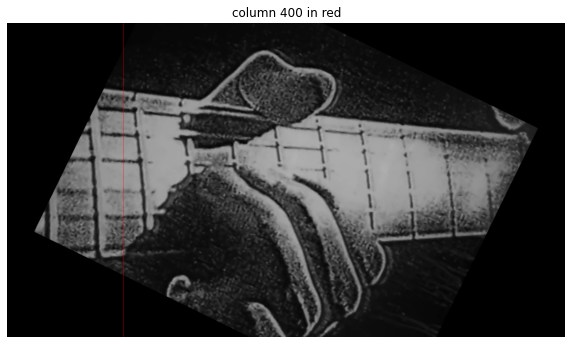

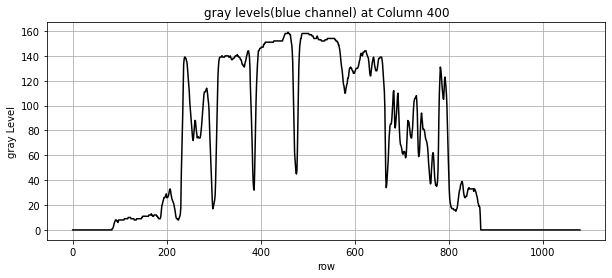

In [6]:
red_400c = rot_frame.copy()
red_400c[:, 400] =[255, 0, 0]  # red line

plt.figure(figsize=(10, 6))
plt.imshow(red_400c)
plt.title("column 400 in red")
plt.axis('off')
plt.show()

blue_chan = rot_frame[:, :, 2]
col_vals = blue_chan[:, 400]  # gray levels at 400

plt.figure(figsize=(10, 4))
plt.plot(col_vals, color='black')
plt.title("gray levels(blue channel) at Column 400")
plt.xlabel("row")
plt.ylabel("gray Level")
plt.grid(True)
plt.show()

3 . Now, for the spatial sampling: sample the image with sampling interval of $\Delta y=58$ (meaning - sample only the rows of the image, with no sampling on the $x$-axis). 

The sampling will start at the middle of the image (the green line in the above figure) and continue towards both directions (i.e., the central row of the image is sampled, and then all the rows in the image that are of $n\cdot\Delta y$ distance from it, for $n\in\mathbb{Z}$ (within image borders, of course)). 

Display the sampled image and a copy of the original image in which the sampled rows are marked in red.

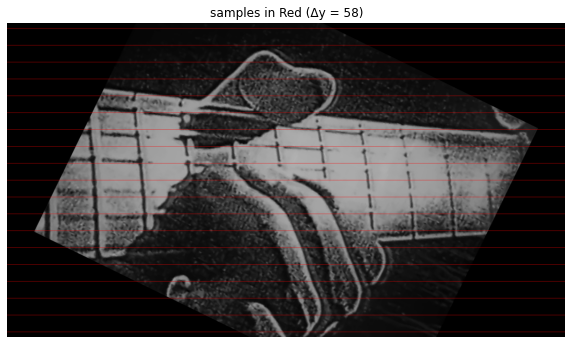

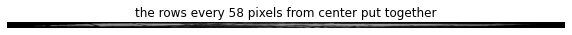

In [7]:
Δy = 58
H, W = rot_frame.shape[:2]
center_row = H // 2

# Compute sampled row indices (symmetric around center)
sampled_rows = np.arange(center_row, -1, -Δy).tolist() + np.arange(center_row + Δy, H, Δy).tolist()
sampled_rows.sort()

# 1. Create sampled image (only sampled rows, keep all columns)
# This will result in fewer rows, but full width
sampled_image = rot_frame[sampled_rows, :, :]

# 2. Visualize original image with sampled rows marked in red
marked_img = rot_frame.copy()
for r in sampled_rows:
    marked_img[r, :] = [255, 0, 0]  # red row in RGB

# Display the original with red lines
plt.figure(figsize=(10, 6))
plt.imshow(marked_img)
plt.title("samples in Red (Δy = 58)")
plt.axis('off')
plt.show()

# Display the sampled image (note: fewer rows)
plt.figure(figsize=(10, 6))
plt.imshow(sampled_image)
plt.title("the rows every 58 pixels from center put together")
plt.axis('off')
plt.show()


4 . In order to evaluate the result of sampling we would like to return the image to its original dimensions. 

We will do so by interpolating on the row dimension, using `cv2.resize` that uses bilinear interpolation by default. Return the sampled image to its original dimensions and display the result.

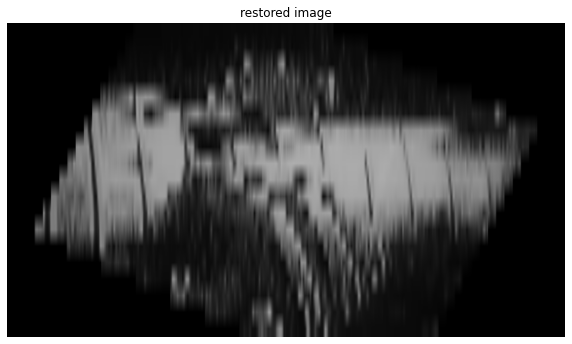

In [8]:
restored_image = cv2.resize(
    sampled_image,
    (rot_frame.shape[1], rot_frame.shape[0]),
    interpolation=cv2.INTER_LINEAR 
)

plt.figure(figsize=(10, 6))
plt.imshow(restored_image)
plt.title("restored image")
plt.axis('off')
plt.show()

5 . Examine our region of interest (the red rectangle in section 1.a.1) in your new image.

How many string shadows can you identify? What's causing this effect?

Create and display a graph containing the gray levels of the `400`th column in one of the color channel you previously chose as a function of the row index for the interpolated image.

What are the differences between this graph and the graph from section 1.a.2? Explain.

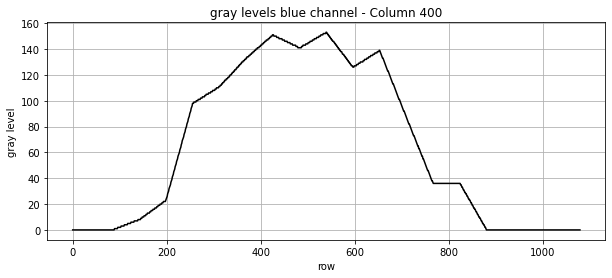

In [9]:
col_vals_interp = restored_image[:, 400, 2]

#gray leves
plt.figure(figsize=(10, 4))
plt.plot(col_vals_interp, color='black')
plt.title("gray levels blue channel - Column 400")
plt.xlabel("row")
plt.ylabel("gray level")
plt.grid(True)
plt.show()

### 1.b - Temporal Sampling:
1. In this part we would like to perform a temporal sample on a time section from the video. Watch the time section between the seconds `10-20`.

In this part we will use only this time section. 

What is the frequency of the pendulum? You may use the `video_to_frames` function from your last python HW.

In [10]:
frames = video_to_frames("../given_data/Dire Straits - Brothers In Arms.mp4", 10, 20)
fps = 25  # or detect it from cv2.VideoCapture if needed

2 . Sample the time section with sampling interval of $\Delta p=37$ (meaning - the frames indexed 0, 37, 74, etc...). 

In order to examine the influence of the temporal sampling, create a new video having the duration of the original time section (10 seconds) and the same FPS rate.

In order to do so, use Zero-Order Hold interpolation: every frame in your sampled video will be translated in the new video into $\Delta p=37$ consecutive frames. 

Create the video and save it in `mp4` format. **Attach the video to your submission in the my_data folder**. (Note that the video does not need to contain sound).

In [11]:
import os

Δp = 37
sampled_frames = frames[::Δp]  # frames at 0, 37, 74, ...
print("sampled frames:", len(sampled_frames))

zoh_frames = []
for frame in sampled_frames:
    zoh_frames.extend([frame] * Δp)

#  extend to 10 seconds = fps * 10 frames
zoh_frames = zoh_frames[:fps * 10]
os.makedirs("../my_data", exist_ok=True)

height, width = zoh_frames[0].shape[:2]
out_path = "../my_data/pendulum_sampled.mp4"

# saw in cv2 funcs
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(out_path, fourcc, fps, (width, height))

for frame in zoh_frames:
    out.write(frame)

out.release()
print(f"saved video to {out_path}")

sampled frames: 7
saved video to ../my_data/pendulum_sampled.mp4


3 . Watch the video you created - What is the difference comparing to the original video? What is the minimal $\Delta p$ to choose, if the desired result is a video with the pendulum staying in its place?

## answer

the video with 37 frame jumps shows the pendulum on either the extreme right or left of its swing, switching every sampled frame, we could double the jumps(to 74 for example) to skip over the frames on one side and be left with a video of the pendulum staying in the same place(we tried it with 74 and it works well enough, the pendulum moves a bit but stays around the same corner).

## <img src="https://img.icons8.com/external-flaticons-lineal-color-flat-icons/64/000000/external-scatter-infographic-flaticons-lineal-color-flat-icons-3.png" style="height:50px;display:inline"/> Part 2 - PCA Compression
---
One of the ways to compress images is by using dimensionality reduction and saving the image representaion in the lower dimension. One of the classic methods for dimensionality reduction is Principal Component Analysis (PCA).

In This part we will examine this method and its performance on a set of images containing faces of people: Labelled Face In the Wild (LFW). The set consists of `13233` gray-scale images of size `64x64`.

* **Note:** You ar not allowed to use PCA functions already implemented in Python packages in this part.

### 2.a - Pre-processing & covariance matrix
1. Uncompress the dataset in a sub-folder named `LFW` in the `given_data` folder. Load all of the images into a 3D numpy array of size `64x64x13233` (after converting them to grayscale). Display 4 images from the data set (remember their indices - these are the images you will restore later in the exercise).
    * **Note: DO NOT upload the data set as part of your submission!**
    <br><br>
1. Define numpy array `X` of size `4096x13233` in which every column represents one of the images in column-major representation (don't forget the `'F'` argument in `np.reshape`). <br><br>

1. Calculate the mean of every pixel in the `X` array (results in a `4096` vector) and display it as a `64x64` image (don't forget the `'F'` argument in `np.reshape`). Now, transform the mean vector into a `4096x1` array and call it `mu`. Subtract `mu` from `X` to get an array of data centered around 0 - call it `Y`. <br><br>

1. Calculate the covariance matrix of `Y` using `np.cov`. Note that the size of the covariance matrix is depended on the size of each sample, and in our case we should get a matrix of size `4096x4096`.

In [12]:
image_paths = sorted(glob.glob("../given_data/LFW/**.pgm", recursive=True))  # includes subfolders if any
assert len(image_paths) == 13233, f"Expected 13233 images, found {len(image_paths)}"

images = np.zeros((64, 64, len(image_paths)), dtype=np.uint8)

for i, path in enumerate(image_paths):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (64, 64))
    images[:, :, i] = img_resized

print("image cube shape:", images.shape)

image cube shape: (64, 64, 13233)


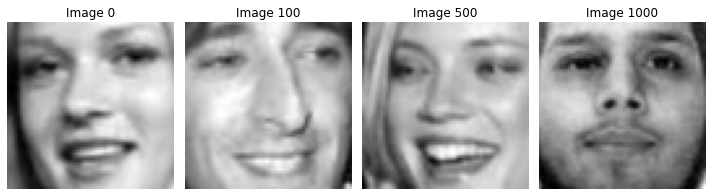

In [13]:
example_indices = [0, 100, 500, 1000]

plt.figure(figsize=(10, 4))
for i, idx in enumerate(example_indices):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[:, :, idx], cmap='gray')
    plt.title(f"Image {idx}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
X = np.zeros((64 * 64, images.shape[2]), dtype=np.float32)

for i in range(images.shape[2]):
    X[:, i] = np.reshape(images[:, :, i], (4096,), order='F')

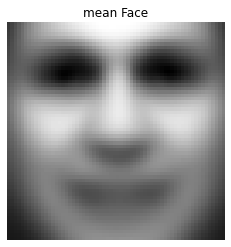

In [15]:
mean_vec = np.mean(X, axis=1)
mean_img = np.reshape(mean_vec, (64, 64), order='F')
plt.imshow(mean_img, cmap='gray')
plt.title("mean Face") #literally
plt.axis('off')
plt.show()


In [16]:
mu = mean_vec.reshape((4096, 1))
Y = X - mu
cov = np.cov(Y, bias=False)
print("cov matrix shape:", cov.shape)

cov matrix shape: (4096, 4096)


### 2.b - Principal Components
The eigenvectors of the covariance matrix are called the **Principal Components**. If one would calculate all of the principal components of our covariance matrix, they will get a spanning set of the $\mathbb{R}^{4096}$ space. In practice, in order to perform dimensionality reduction, we want to project our data into a lower dimension. In PCA we do so by projecting every image into a space with a spanning set of $k$ eigenvectors (principal components) corresponding to the $k$ largest eigenvalues of the covariance matrix.

Calculate the `k=10` largest eigenvalues of the covariance matrix and their corresponding principal components. 
* The parameter `eig_vals` will contain the `k=10` eigenvalues in descending order (largest eigenvalue first).
* The parameter `eig_vecs` will contain a matrix in which the columns are the corresponding principal components in order respective to `eig_vals`. 
* The covariance matrix is symmetric, so you can use `np.linalg.eigh` in order to find them. 

Display a plot of the `eig_vals` vector. In addition, display the first 4 principal components in `eig_vecs` as images of size `64x64` (don't forget the `'F'` argument in `np.reshape`).

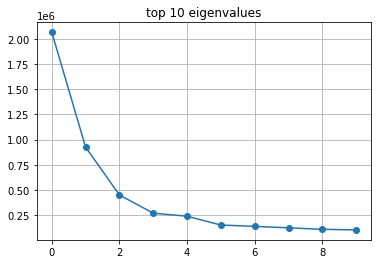

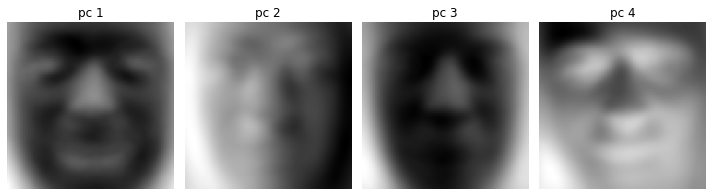

In [17]:
eig_vals_all, eig_vecs_all = np.linalg.eigh(cov)
idx = np.argsort(eig_vals_all)[::-1]
k = 10
eig_vals = eig_vals_all[idx[:k]]
eig_vecs = eig_vecs_all[:, idx[:k]]

plt.plot(eig_vals, marker='o')
plt.title("top 10 eigenvalues")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
for i in range(4):
    img = np.reshape(eig_vecs[:, i], (64, 64), order='F')
    plt.subplot(1, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"pc {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()


### 2.c - Compression by projection
Find the projection of every image in the space spanned by the `k=10` principal components by calculating:
$$ P = V^T Y $$
where $V$ is the `eig_vecs` matrix and $Y$ is the data matrix `Y`.

Note that now each column of the matrix $P$ is actually a representation of one image from the data set (after subtracting the mean), in the lower dimension.

In [18]:
P = eig_vecs.T @ Y
print(P)


[[  717.69240166  1050.5233984   -422.60832764 ...  2423.61617622
  -1594.54506588   322.30390771]
 [-1952.46284714   442.67208798  1912.61158414 ...   -52.00558894
   -934.14458022   288.80443933]
 [ -319.95058922   -92.09639154  -428.0087415  ...  -982.49545569
   -247.10641667   314.97279184]
 ...
 [  -44.41021358    76.6817482   -359.79355347 ...   -57.30308586
    113.05644987   215.77615363]
 [  242.95392307   164.91326779   107.71433341 ...   383.16237642
     18.63791175  -752.32648893]
 [  102.82313123   532.39038857  -259.41263381 ...   242.86807728
   -153.32305551   364.96962536]]


### 2.d - Restoration
For the 4 images you presented in section 2.a.1, extract the appropriate columns in the $P$ matrix. We will denote each column as $p_i$ where $i\in \{1,2,3,4\}$. Find $\hat{x}_i$, the restoration of each column by applying:
$$\hat{x}_i=Vp_i+\mu$$
Where $\mu$ is the calculated mean `mu`. Display the 4 restored images (sized `64x64`). In the title of each image display the MSE between the original image and the restoration. Reminder:
$$MSE_i=\frac{1}{MN}\sum_{m=0}^{M-1}\sum_{n=0}^{N-1}(x_i[m,n]-\hat{x}_i[m,n])^2$$
Where $x_i$ is the original image corresponding to column $p_i$ in $X$.

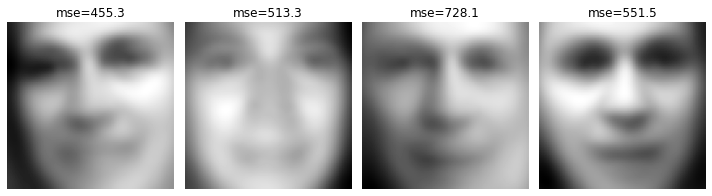

In [19]:
idxs = [0, 100, 500, 1000]
plt.figure(figsize=(10, 4))
for i, idx in enumerate(idxs):
    pi = P[:, idx]
    xi_hat = eig_vecs @ pi + mu.flatten()
    mse = np.mean((X[:, idx] - xi_hat) ** 2)
    img = np.reshape(xi_hat, (64, 64), order='F')
    plt.subplot(1, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"mse={mse:.1f}")
    plt.axis('off')
plt.tight_layout()
plt.show()


### 2.e - Changing $k$ value
Now, compress `Y` using `k=570` principal components, and restore and display again the 4 images you chose. What do you think of the restored results now? Compare to the `k=10` case. Note that although we have enlarged the dimension of the images in the low dimesional space, it is still less than 7 times (!) smaller than the original image.

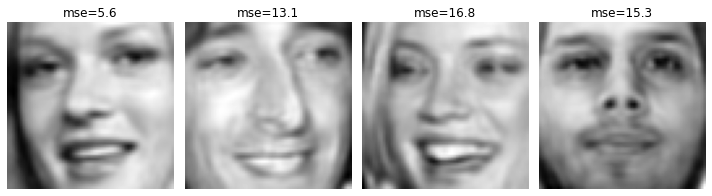

In [20]:
k = 570
eig_vals_full, eig_vecs_full = np.linalg.eigh(cov)
idx = np.argsort(eig_vals_full)[::-1]
eig_vecs = eig_vecs_full[:, idx[:k]]
eig_vals = eig_vals_full[idx[:k]]

P = eig_vecs.T @ Y

idxs = [0, 100, 500, 1000]
plt.figure(figsize=(10, 4))
for i, idx in enumerate(idxs):
    pi = P[:, idx]
    xi_hat = eig_vecs @ pi + mu.flatten()
    mse = np.mean((X[:, idx] - xi_hat) ** 2)
    img = np.reshape(xi_hat, (64, 64), order='F')
    plt.subplot(1, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"mse={mse:.1f}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## <img src="https://img.icons8.com/external-others-pike-picture/50/000000/external-comparison-recognition-others-pike-picture.png" style="height:50px;display:inline"/> Part 3 - Image Restoration
---
In this part we aim to restore an image from its noisy version. In class, you learned about image restoration as solutions to optimization problems. This field views images from a probabilistic standpoint to restore blurred or noisy images.

During this part we will use the movie trailer of Flash Gordon. Feel free to open the file `Flash Gordon Trailer.mp4`, to watch the video and enjoy the great music by Queen. :)

For this task, we'll test two different restoration algorithms. However, to do so, we need to create a noisy version of a given image first.

### 3.a - Pre-processing - Creating a noisy image
* Load one frame from the video `Flash Gordon Trailer.mp4`. The frame must be taken from the time section `00:20-00:21`. The python workshop document can help with this task.
* Display this frame as a color image. 
* Choose **one** of the color channels out of the chosen frame: the **red** channel or the **green** channel. Display the grayscale image of the chosen channel. 
* Decrease the size of the image by a factor of 2 using `cv2.resize`. From now on we will use only this channel (after the resize) as our original image.
* Implement the `poisson_noisy_image` function, defined below, by following this procedure:<br>
  Let $a$ be the number of photons that have to arrive into the camera in order to be translated into one gray level. Now, we will create our Poisson noisy image (a.k.a shot noise) in a way which simulates realistic noise induced in an image taken by an optical camera (photon counting):
    1. transform the type of `X`, the input image, to `float` (the values of the image should still be in the range of `[0,255]`, just represented as `float` istead of `uint8`) and multiply the gray level values by $a$ in order to transform the image to number of photons units.
    2. Create a new Poisson noisy image by applying `np.random.poisson` on your image. Using this command, the value of every pixel in the input (number of photons) is referred to as the mean of a Poisson-distributed random variable.
    3. Divide the resulting image by $a$ in order to return the image to normal gray levels.
    4. Clip the image to `[0,255]` using `np.clip`, and transform the image type back to `uint8`.
    5. The noisy image you got will be the image $Y$.
* Make a noisy image out of the resized grayscale image using the `poisson_noisy_image` function with `a=3`.
* Display the noisy image result.


In [21]:
def poisson_noisy_image(X, a):
    """
    Creates a Poisson noisy image.
    :param X: The Original image. np array of size [H x W] and of type uint8.
    :param a: number of photons scalar factor
    :return:
        Y: The noisy image. np array of size [H x W] and of type uint8.
    """
    # ====== YOUR CODE: ======
    Xf = X.astype(np.float32) * a
    noisy = np.random.poisson(Xf).astype(np.float32)
    Y = np.clip(noisy / a, 0, 255).astype(np.uint8)
    # ========================
    
    return Y

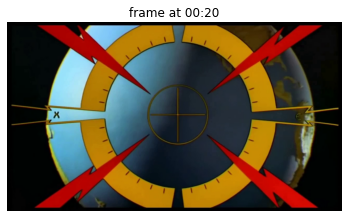

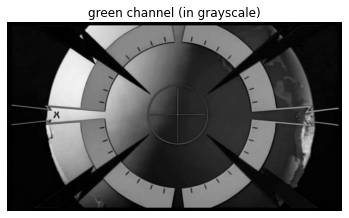

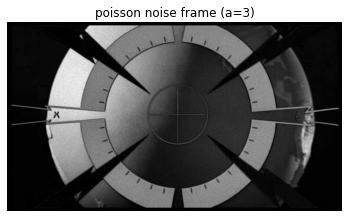

In [22]:
#get frame from sec 20
cap = cv2.VideoCapture("../given_data/Flash Gordon Trailer.mp4")
fps = cap.get(cv2.CAP_PROP_FPS)
frame_idx = int(20 * fps)
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
ret, frame = cap.read()
cap.release()

#show color img
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title("frame at 00:20")
plt.axis('off')
plt.show()

# green channel and display as gray
green = frame[:, :, 1]
plt.imshow(green, cmap='gray')
plt.title("green channel (in grayscale)")
plt.axis('off')
plt.show()

green_small = cv2.resize(green, (green.shape[1]//2, green.shape[0]//2))#resize
#add noise and display
Y = poisson_noisy_image(green_small, a=3)
plt.imshow(Y, cmap='gray')
plt.title("poisson noise frame (a=3)")
plt.axis('off')
plt.show()

### 3.b - Denoise by L2
Let $Y$ be a noisy image version of the image $X$. In order to restore $X$ out of $Y$ we would would to minimize the following expression (cost function):
$$\varepsilon^2\{\underline{X}\}=(\underline{X}-\underline{Y})^T(\underline{X}-\underline{Y})+\lambda(D\underline{X})^T(D\underline{X})$$

Where $\underline{X}$ is a column-stack vector of the image $X$, $\underline{Y}$ is a column-stack vector of the noisy image $Y$, $\lambda$ is the regularization parameter, and $D$ is a sparse matix of the Laplacian operator, given by the kernel:
$$D_{kernel}=\begin{bmatrix}
0 & 1 & 0\\
1 & -4 & 1\\
0 & 1 & 0
\end{bmatrix}$$

In order to restore the source image we will apply an iterative process, based on the Steepest Descent algorithm. The update step of the algorithm is:
$$\underline{\hat{X}}_{k+1} = \underline{\hat{X}}_{k}-\mu_k\underline{G}_k = \underline{\hat{X}}_{k}-\mu_k((I+\lambda D^TD)\underline{\hat{X}}_{k}-\underline{Y})$$
Where $I$ is the identity matrix and $\mu_k$ is the step size, which is determined by:
$$\mu_k = \frac{\underline{G}_k^T\underline{G}_k}{\underline{G}_k^T(I+\lambda D^TD)\underline{G}_k}$$
The process is initialized with $\underline{\hat{X}}_{0}=\underline{Y}$.

Implement the algorithm described above in the following function, where `Err1,2` are defined as follows:
$$
Err1\{\underline{\hat{X}}_{k}\}=(\underline{\hat{X}}_{k}-\underline{Y})^T(\underline{\hat{X}}_{k}-\underline{Y})+\lambda (D\underline{\hat{X}}_{k})^T(D\underline{\hat{X}}_{k})
$$
$$
Err2\{\underline{\hat{X}}_{k}\}=(\underline{\hat{X}}_{k}-\underline{X})^T(\underline{\hat{X}}_{k}-\underline{X})
$$

In [23]:
def denoise_by_l2(Y, X, num_iter, lambda_reg):
    """
    L2 image denoising.
    :param Y: The noisy image. np array of size [H x W]
    :param X: The Original image. np array of size [H x W]
    :param num_iter: the number of iterations for the algorithm perform
    :param lambda_reg: the regularization parameter
    :return:
    Xout: The restored image. np array of size [H x W]
    Err1: The error between Xk at every iteration and Y.
    np array of size [num_iter]
    Err2: The error between Xk at every iteration and X.
    np array of size [num_iter]
    """
    # ====== YOUR CODE: ======
    h, w = Y.shape
    Y_vec = Y.flatten().astype(np.float32)
    X_vec = X.flatten().astype(np.float32)
    Xk = Y_vec.copy()

    kernel = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]], dtype=np.float32)

    Err1 = np.zeros(num_iter)
    Err2 = np.zeros(num_iter)

    for k in range(num_iter):
        Xk_img = Xk.reshape((h, w))
        D_Xk = cv2.filter2D(Xk_img, -1, kernel, borderType=cv2.BORDER_REFLECT)
        D_Xk_flat = D_Xk.flatten()
        DtD_Xk = cv2.filter2D(D_Xk, -1, kernel, borderType=cv2.BORDER_REFLECT).flatten()

        Gk = (Xk - Y_vec) + lambda_reg * DtD_Xk
        muk_num = np.dot(Gk, Gk)
        Gk_img = Gk.reshape((h, w))
        D_Gk = cv2.filter2D(Gk_img, -1, kernel, borderType=cv2.BORDER_REFLECT)
        D_Gk_flat = D_Gk.flatten()
        DtD_Gk = cv2.filter2D(D_Gk, -1, kernel, borderType=cv2.BORDER_REFLECT).flatten()
        muk_den = np.dot(Gk, Gk + lambda_reg * DtD_Gk)

        muk = muk_num / muk_den if muk_den != 0 else 0
        Xk = Xk - muk * Gk

        Err1[k] = np.sum((Xk - Y_vec) ** 2) + lambda_reg * np.sum(D_Xk_flat ** 2)
        Err2[k] = np.sum((Xk - X_vec) ** 2)

    Xout = Xk.reshape((h, w)).astype(np.uint8)
    # ========================

    return Xout, Err1, Err2

Note that your algorithm uses the original image `X` only to calculate `Err2`, you sould not use it anywhere else in the algorithm!

**Guidance**: Note that your inputs `Y,X` and your output `Xout` are image matrices (2d numpy arrays), but $\underline{Y},\underline{\hat{X}}, \underline{\hat{X}}_k$ are column-major order vectors. Use `npmatrix.flatten('F')` to create a column-order vector out of `npmatrix`. In addition, it is recommended to calculate the multlipication with $D$ using convolution with the kernel, and **not** calculating the full Toeplitz matrix. Note that every time you encounter a multlipication with $D$ in your calculation you must:
1. Transform the column vector into a matrix, using column-major order (`np.reshape(vector, newshape, order='F')`).
2. Convolve the matrix with the kernel using `cv2.filter2D` (note that the result has the same size as the input - 'same' convolution, and again - $D_{kernel}$ is symmetric so it doesn't matter that `cv2.filter2D` performs correlation and not convolution).
3. Transform the resulting matrix back to a cloumn vector.
* Notice that for example the $\lambda D^T D \underline{\hat{X}}$ part requires you to do the above process twice.

Now, use the function you wrote on the noisy image you created in section 3.a. use `lambda_reg = 0.5` and `num_iters = 50`. Display the result of the restoration in your report.

In addition, display **on a single graph** a logarithmic plot of the errors `Err1` and `Err2` as a function of the iteration number, and explain.

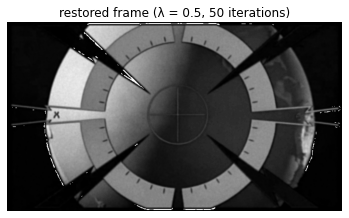

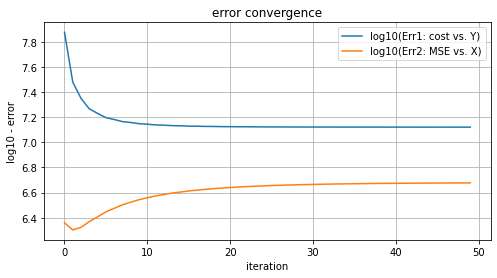

In [24]:
    # ====== YOUR CODE: ======
lambda_reg = 0.5
num_iters = 50

Xout_l2, Err1_l2, Err2_l2 = denoise_by_l2(Y, green_small  , num_iters, lambda_reg)

# Show restored image
plt.imshow(Xout_l2, cmap='gray')
plt.title("restored frame (λ = 0.5, 50 iterations)")
plt.axis('off')
plt.show()

# Plot errors in log scale
plt.figure(figsize=(8, 4))
plt.plot(np.log10(Err1_l2), label='log10(Err1: cost vs. Y)')
plt.plot(np.log10(Err2_l2), label='log10(Err2: MSE vs. X)')
plt.xlabel("iteration")
plt.ylabel("log10 - error")
plt.title("error convergence")
plt.grid(True)
plt.legend()
plt.show()

    # ========================

### 3.c - Denoise by Total Variation
Now you will implement a restoration using a Total Variation prior. Meaning, you will work with the following cost function:
$$\varepsilon^2\{\underline{X}\}=(\underline{X}-\underline{Y})^T(\underline{X}-\underline{Y})+\lambda\cdot TV\{\underline{X}\}$$
Where $TV\{X\}$ is the Total Variation function:
$$ TV\{X\}=\sum_{x,y}|\nabla X|=\sum_{x,y}\sqrt{\left(\frac{\partial X}{\partial x}\right)^2+\left(\frac{\partial X}{\partial y}\right)^2}$$
Where $x,y$ are the 2D axes of the image.
In order to perform restoration, we will again use an iterative process as in section 3.b, but now we will apply a gradient step appropriate to TV:
$$\hat{X}_{k+1} = \hat{X}_{k}+\frac{\mu_k}{2}U_k = \hat{X}_{k}+\frac{\mu_k}{2}\left(2\left(Y-\hat{X}_{k}\right)+\lambda\nabla\cdot\left(\frac{\nabla\hat{X}_{k}}{\sqrt{|\nabla\hat{X}_{k}|^2+\epsilon_0^2}}\right)\right)$$
Note that there are no underlines in the above equation - here we use the images' matrices.

Implement this algorithm in the following function, where `Err1` is now defined as:
$$
Err1\{\underline{\hat{X}}_{k}\}=(\underline{\hat{X}}_{k}-\underline{Y})^T(\underline{\hat{X}}_{k}-\underline{Y})+\lambda\cdot TV\{\underline{\hat{X}}_{k}\}
$$ 

In [25]:
def denoise_by_TV(Y, X, num_iter, lambda_reg, epsilon0):
    """
    TV image denoising.
    :param Y: The noisy image. np array of size [H x W]
    :param X: The Original image. np array of size [H x W]
    :param num_iter: the number of iterations for the algorithm perform
    :param lambda_reg: the regularization parameter
    :param: epsilon0: small scalar for numerical stability
    :return:
    Xout: The restored image. np array of size [H x W]
    Err1: The error between Xk at every iteration and Y.
    np array of size [num_iter]
    Err2: The error between Xk at every iteration and X.
    np array of size [num_iter]
    """
    # ====== YOUR CODE: ======
    h, w = Y.shape
    mu = 150 * epsilon0
    Xk = Y.astype(np.float32)
    Err1 = np.zeros(num_iter)
    Err2 = np.zeros(num_iter)

    for k in range(num_iter):
        gx, gy = np.gradient(Xk)
        grad_magnitude = np.sqrt(gx**2 + gy**2 + epsilon0**2)
        dx = gx / grad_magnitude
        dy = gy / grad_magnitude
        dx_x, dx_y = np.gradient(dx)
        dy_x, dy_y = np.gradient(dy)
        divergence = dx_x + dy_y
        Xk = Xk + mu * ((Y - Xk) + lambda_reg * divergence)

        gx2, gy2 = np.gradient(Xk)
        tv = np.sum(np.sqrt(gx2**2 + gy2**2 + epsilon0**2))
        Err1[k] = np.sum((Xk - Y)**2) + lambda_reg * tv
        Err2[k] = np.sum((Xk - X)**2)

    Xout = Xk.astype(np.uint8)

    return Xout, Err1, Err2

**Guidance:** Find the image's derivatives using `np.gradient`.
think about how to use this function in order to also calculate a divergence.

Initilazation and hyperparameters:
* $\underline{\hat{X}}_{0} = \underline{Y}$
* constant step size: $\mu_k=\mu=150\epsilon_0$

Now, use the function you wrote on the noisy image you created in section 3.a. use `lambda_reg = 20` and `num_iters = 200`. 
Try some different values for $\epsilon_0$ in the range $[10^{-7},10^{-3}]$, and choose a compatible one (by looking at the visual result and by making sure that that the error plot reaches convergence and a low value). Denote the chosen $\epsilon_0$ in your report. After choosing $\epsilon_0$, display the restored image in your report. 

In addition, display **on a single graph** a logarithmic plot of the errors `Err1` and `Err2` as a function of the iteration number, and explain.

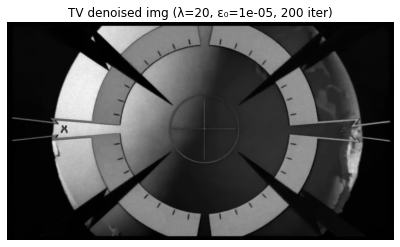

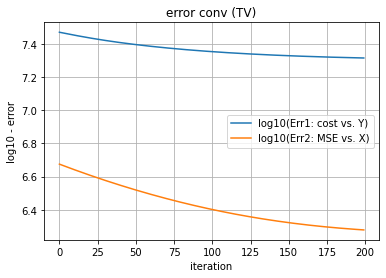

In [26]:
    # ====== YOUR CODE: ======
lambda_reg = 20
num_iter = 200
epsilon0 = 1e-5

Xout_TV, Err1_TV, Err2_TV = denoise_by_TV(Y, green_small, num_iter, lambda_reg, epsilon0)

# plot results
plt.figure(figsize=(8, 4))
plt.imshow(Xout_TV, cmap='gray')
plt.title(f"TV denoised img (λ={lambda_reg}, ε₀={epsilon0}, {num_iter} iter)")
plt.axis('off')
plt.show()

plt.figure()
plt.plot(np.log10(Err1_TV), label='log10(Err1: cost vs. Y)')
plt.plot(np.log10(Err2_TV), label='log10(Err2: MSE vs. X)')
plt.xlabel("iteration")
plt.ylabel("log10 - error")
plt.title("error conv (TV)")
plt.legend()
plt.grid(True)
plt.show()

    # ========================

### 3.d - Results analysis
Express your opinion regarding the results. Present the L2 and TV restorations side by side and the errors plots side by side. Compare the results quantitivly (using `Err1,2` values) and qualitativly (by looking at the restored images). Do your results fit the theory taught in class? 

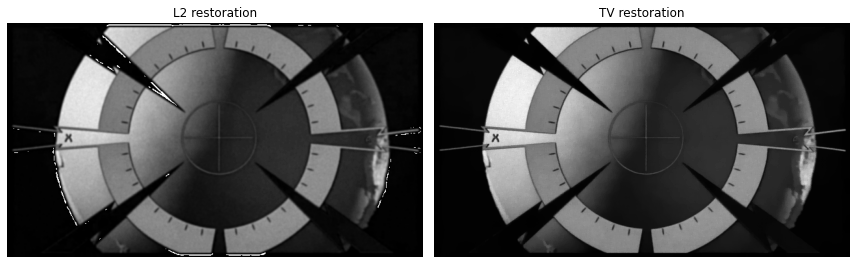

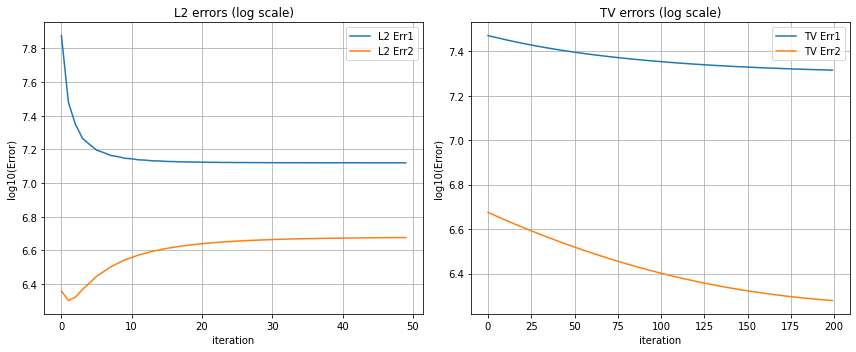

In [27]:
    # ====== YOUR CODE: ======
# display L2 vs TV restored images
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(Xout_l2, cmap='gray')
plt.title("L2 restoration")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(Xout_TV, cmap='gray')
plt.title("TV restoration")
plt.axis('off')

plt.tight_layout()
plt.show()

# plot Err1 and Err2 for L2 and TV
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(np.log10(Err1_l2 + 1e-8), label='L2 Err1')
plt.plot(np.log10(Err2_l2 + 1e-8), label='L2 Err2')
plt.title("L2 errors (log scale)")
plt.xlabel("iteration")
plt.ylabel("log10(Error)")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(np.log10(Err1_TV + 1e-8), label='TV Err1')
plt.plot(np.log10(Err2_TV + 1e-8), label='TV Err2')
plt.title("TV errors (log scale)")
plt.xlabel("iteration")
plt.ylabel("log10(Error)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

    # ========================

### 3.e - From synthetic to natural
Up to this point we worked with a synthetic image (created by computer graphics). We now want to test the performance of both algorithms using more "natural" images. 

Choose another frame from the video `Flash Gordon Trailer.mp4`. The frame must be taken from the time section `00:38-00:39` and must contain a natural image. Choose one of the color channels of the frame (Red or Green), decrease the size of the image by a factor of 2, and make a noisy image (according to the instructions in section 3.a). Repeat the denoising processes (1.b, 1.c). Display the restored images and the errors plots in your report. Explain - what are the differences examining the natural images results in comparison to the synthetic ones? Discuss `Err1,2` values and the restored images quality.

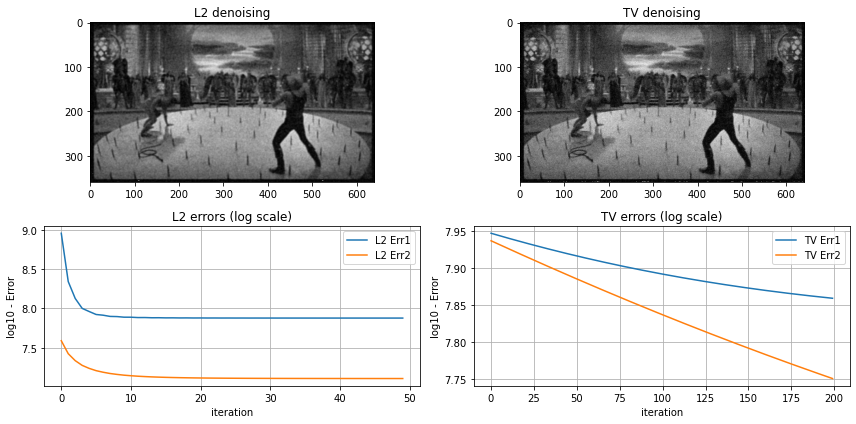

In [28]:
    # ====== YOUR CODE: ======
    # frame at 00:38
    cap = cv2.VideoCapture('../given_data/Flash Gordon Trailer.mp4')
    fps = cap.get(cv2.CAP_PROP_FPS)
    target_frame = int(38 * fps)
    cap.set(cv2.CAP_PROP_POS_FRAMES, target_frame)
    ret, frame = cap.read()
    cap.release()

    #  green channel and downsize by half
    frame_gray = frame[:, :, 1]
    frame_resized = cv2.resize(frame_gray, (0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

    # add noise
    sigma = 20
    Y = frame_resized + sigma * np.random.randn(*frame_resized.shape)
    Y = np.clip(Y, 0, 255).astype(np.uint8)
    X = frame_resized.astype(np.uint8)

    # use l2 denoise
    lambda_l2 = 0.5
    num_iter_l2 = 50
    X_l2, Err1_l2, Err2_l2 = denoise_by_l2(Y, X, num_iter_l2, lambda_l2)

    # TV denoise
    lambda_tv = 20
    epsilon0 = 1e-5
    num_iter_tv = 200
    X_tv, Err1_tv, Err2_tv = denoise_by_TV(Y, X, num_iter_tv, lambda_tv, epsilon0)

    # print both to compare
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.imshow(X_l2, cmap='gray')
    plt.title("L2 denoising")

    plt.subplot(2, 2, 2)
    plt.imshow(X_tv, cmap='gray')
    plt.title("TV denoising")
    
    #print errors
    plt.subplot(2, 2, 3)
    plt.plot(np.log10(Err1_l2), label='L2 Err1')
    plt.plot(np.log10(Err2_l2), label='L2 Err2')
    plt.title('L2 errors (log scale)')
    plt.xlabel("iteration")
    plt.ylabel("log10 - Error")
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 4)
    plt.plot(np.log10(Err1_tv), label='TV Err1')
    plt.plot(np.log10(Err2_tv), label='TV Err2')
    plt.title('TV errors (log scale)')
    plt.xlabel("iteration")
    plt.ylabel("log10 - Error")
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

    # ========================

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com